In [8]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#reading a the values into a Dataframe
df = pd.read_csv('age_crime.csv')
df =pd.DataFrame(df)

In [10]:
rename = {'Year':'Year',
          'Year ending':'Month',
          'Sex':'Sex',
          'Age Group':'AgeGroup',
          'Offence Division':'OffenseDiv',
          'Alleged Offender Incidents':'CountofIncidents'
          }
#renaming column to make it easier
df.rename(index=str, columns=rename, inplace=True)

In [11]:
# Check
print(df)
print(df.dtypes)

      Year     Month      Sex           AgeGroup  \
0     2021  December  Females        10-14 years   
1     2021  December  Females        10-14 years   
2     2021  December  Females        10-14 years   
3     2021  December  Females        10-14 years   
4     2021  December  Females        10-14 years   
...    ...       ...      ...                ...   
1546  2012  December    Males  65 years and over   
1547  2012  December    Males  65 years and over   
1548  2012  December    Males  65 years and over   
1549  2012  December    Males  65 years and over   
1550  2012  December    Males  65 years and over   

                                OffenseDiv CountofIncidents  
0              A Crimes against the person              657  
1        B Property and deception offences              557  
2                          C Drug offences               21  
3     D Public order and security offences               53  
4            E Justice procedures offences               47  
...

In [12]:
#Cleaning of file
df["CountofIncidents"] = df["CountofIncidents"].str.replace(",","").astype(int)
df["CountofIncidents"] = pd.to_numeric(df["CountofIncidents"])

print(df.dtypes)

Year                 int64
Month               object
Sex                 object
AgeGroup            object
OffenseDiv          object
CountofIncidents     int32
dtype: object


<Figure size 504x432 with 0 Axes>

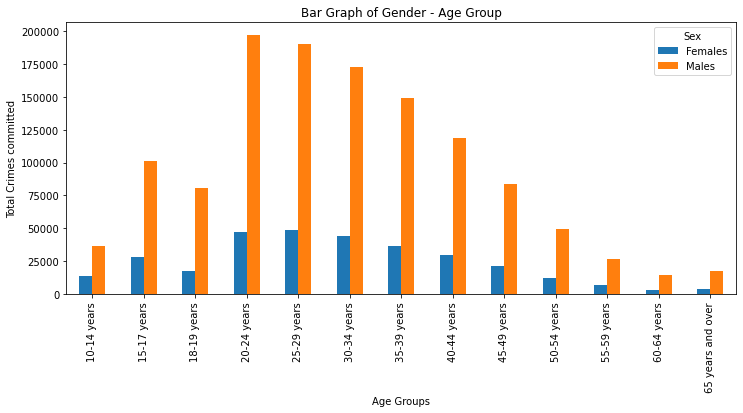

In [13]:
# graph 1
gender = df.groupby(['AgeGroup', 'Sex']).CountofIncidents.sum().unstack()
plt.rcParams["figure.figsize"] = (12, 5)
plt.figure(figsize=(7, 6))
#plotting a bar graph
ax = gender.plot(kind='bar')
ax.set_title("Bar Graph of Gender - Age Group", y = 1)
ax.set_xlabel('Age Groups')
ax.set_ylabel('Total Crimes committed')

# for rect in ax.patches:
#     y_value = rect.get_height()
#     x_value = rect.get_x() + rect.get_width() / 2
#     space = 1
#     label = format(y_value)
#     #formatting labels and the values
#     ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')

plt.savefig("Fig1__Gender_Age_Group.png")
plt.show()

In [ ]:
# Most number of crimes were committed by Males between the age group of - 196700
#  Females between the age group of  25-29 are most involved in crimes
#  Females are less involved in crimes when compared to males

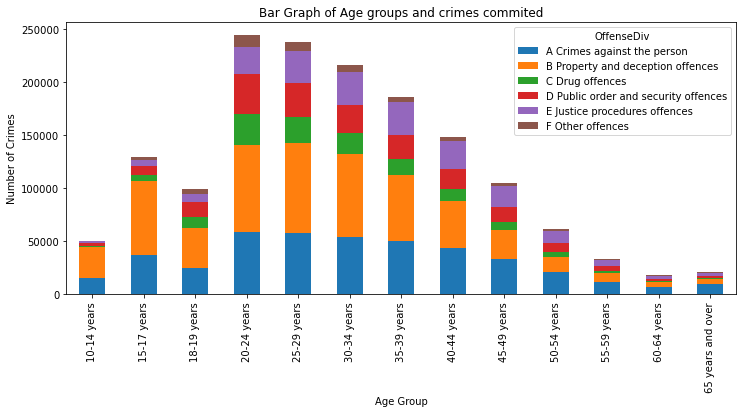

In [14]:
#Graph 2
gender1 = df.groupby(['AgeGroup', 'OffenseDiv']).CountofIncidents.sum().unstack()
# plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = (12, 5)
# plt.figure(figsize=(20, 20))
ax = gender1.plot(kind='bar', stacked=True)
ax.set_title("Bar Graph of Age groups and crimes commited", y = 1)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Crimes')

# for rect in ax.patches:
#     height = rect.get_height()
#     width =rect.get_width()
#     x = rect.get_x()
#     y = rect.get_y()
#     label_text = height
#     label_y = y + height / 2
#     label_x = x + width / 2
#     ax.text(label_x, label_y, label_text, ha='center',
#             va='top')
    
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.savefig("Fig2_Age_Group_Crime.png")
plt.show()